# Training

In [ ]:
!pip install roboflow --quiet
!pip install ultralytics --quiet


In [ ]:
!mkdir datasets

from roboflow import Roboflow
rf = Roboflow(api_key="ehywoEwlkCFipTl4R4wb")
project = rf.workspace("unsw-urbanai").project("roof-segment")
dataset = project.version(4).download("yolov8")


In [ ]:
!mv Roof-segment-4 datasets
!mv datasets/Roof-segment-4/data.yaml .
data_yaml = """
names:
- Roof
nc: 1
roboflow:
  license: CC BY 4.0
  project: roof-segment
  url: https://universe.roboflow.com/unsw-urbanai/roof-segment/dataset/4
  version: 4
  workspace: unsw-urbanai
test: ../test/images
train: ../Roof-segment-4/train/images
val: ../Roof-segment-4/valid/images
"""
f = open("datasets/Roof-segment-4/data.yaml", "w")
f.write(data_yaml)
f.close()


In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt  data=datasets/Roof-segment-4/data.yaml epochs=300 imgsz=640

In [ ]:
!cp runs/segment/train/weights/best.pt . 

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="ehywoEwlkCFipTl4R4wb")
project = rf.workspace("unsw-urbanai").project("roof-segment")
dataset = project.version(5).download("yolov8")

In [ ]:
!mv Roof-segment-5 datasets
!mv datasets/Roof-segment-5/data.yaml .
data_yaml = """
names:
- Roof
nc: 1
roboflow:
  license: CC BY 4.0
  project: roof-segment
  url: https://universe.roboflow.com/unsw-urbanai/roof-segment/dataset/4
  version: 4
  workspace: unsw-urbanai
test: ../test/images
train: ../Roof-segment-5/train/images
val: ../Roof-segment-5/valid/images
"""
f = open("datasets/Roof-segment-5/data.yaml", "w")
f.write(data_yaml)
f.close()


In [ ]:
!yolo task=segment mode=train model=best.pt  data=datasets/Roof-segment-5/data.yaml epochs=300 imgsz=640


# Predict

In [1]:
!cp runs/segment/train2/weights/best.pt .

In [111]:
!pip install sahi --quiet

In [112]:
!pip list | grep ultralytics
!pip list | grep sahi

ultralytics                              8.0.134
sahi                                     0.11.14


In [4]:
!ls /kaggle/input/building-detect

google_satellite.png  stitched_image.png  stitched_image2.png


In [4]:
# !pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="ehywoEwlkCFipTl4R4wb")
project = rf.workspace("unsw-urbanai").project("roof-segment")
dataset = project.version(5).download("yolov8")


A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Roof-segment-5 in yolov8:: 100%|██████████| 886/886 [00:00<00:00, 5398.46it/s]


In [1]:
from sahi.utils.yolov8 import download_yolov8s_model
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from pathlib import Path
from IPython.display import Image
from ultralytics import YOLO
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt
# Download YOLOv8 model
yolov8_model_path = "best.pt"
model = YOLO(yolov8_model_path)



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def convert_to_polygon(results, input_image):
    polygons = []
    for detection in results:
        masks = detection.masks
        masks.numpy
        for mask in masks.data:
            mask_np = mask.cpu().numpy().astype(np.uint8)
            contours, _ = cv2.findContours(mask_np, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for contour in contours:
                polygon = contour.reshape((-1, 2))
                cv2.polylines(input_image, [polygon], True, (255, 0, 0), thickness=1)
                polygons.append(polygon)
    return polygons



0: 640x640 61 Roofs, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


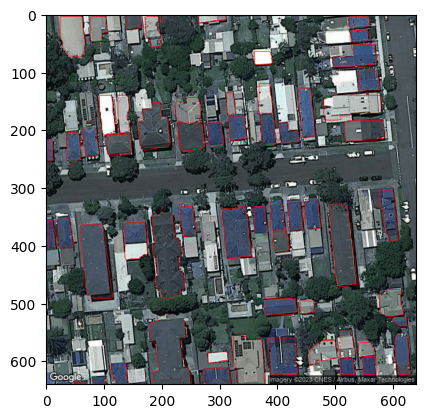

In [4]:

import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)



# im1 = Image.open("/kaggle/input/building-detect/google_satellite.png")
input_image = cv2.imread("/kaggle/input/building-detect/google_satellite.png")
results = model.predict(input_image, conf=0.3)
# results
for detection in results:
    masks = detection.masks
    for mask in masks.data:
        mask_np = mask.cpu().numpy().astype(np.uint8)
        contours, _ = cv2.findContours(mask_np, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            polygon = contour.reshape((-1, 2))
            cv2.polylines(input_image, [polygon], True, (255, 0, 0), thickness=1)
plt.imshow(input_image)
plt.show()
# plt.imshow()
# plt.show()


In [14]:
results[0].masks.data.cpu().detach().numpy()
# .numpy()
# 

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [108]:
# OBSS SAHI Tool
# Code written by AnNT, 2023.


from typing import Any, Dict, List, Optional

import numpy as np


from sahi.models.base import DetectionModel
from sahi.prediction import ObjectPrediction
from sahi.utils.compatibility import fix_full_shape_list, fix_shift_amount_list
from sahi.utils.import_utils import check_requirements






In [42]:
from PIL import Image
# im1 = Image.open("/kaggle/input/building-detect/google_satellite.png")
results = model.predict("/kaggle/input/building-detect/stitched_image.png")
results[0].masks.masks [0] 


image 1/1 /kaggle/input/building-detect/google_satellite.png: 640x640 63 Roofs, 12.5ms
Speed: 0.8ms pre-process, 12.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [90]:
import logging
import os
import time
from typing import List, Optional
from sahi.slicing import get_slice_bboxes

from sahi.utils.import_utils import is_available

# https://github.com/obss/sahi/issues/526
if is_available("torch"):
    import torch

from functools import cmp_to_key

import numpy as np
from tqdm import tqdm

from sahi.auto_model import AutoDetectionModel
from sahi.models.base import DetectionModel
from sahi.postprocess.combine import (
    GreedyNMMPostprocess,
    LSNMSPostprocess,
    NMMPostprocess,
    NMSPostprocess,
    PostprocessPredictions,
)
from sahi.prediction import ObjectPrediction, PredictionResult
from sahi.slicing import slice_image
from sahi.utils.coco import Coco, CocoImage
from sahi.utils.cv import (
    IMAGE_EXTENSIONS,
    VIDEO_EXTENSIONS,
    crop_object_predictions,
    cv2,
    get_video_reader,
    read_image_as_pil,
    visualize_object_predictions,
)
from sahi.utils.file import Path, increment_path, list_files, save_json, save_pickle
from sahi.utils.import_utils import check_requirements

POSTPROCESS_NAME_TO_CLASS = {
    "GREEDYNMM": GreedyNMMPostprocess,
    "NMM": NMMPostprocess,
    "NMS": NMSPostprocess,
    "LSNMS": LSNMSPostprocess,
}

LOW_MODEL_CONFIDENCE = 0.1
def my_get_sliced_prediction(
    image,
    detection_model=None,
    slice_height: int = None,
    slice_width: int = None,
    overlap_height_ratio: float = 0.2,
    overlap_width_ratio: float = 0.2,
    perform_standard_pred: bool = True,
    postprocess_type: str = "GREEDYNMM",
    postprocess_match_metric: str = "IOS",
    postprocess_match_threshold: float = 0.5,
    postprocess_class_agnostic: bool = False,
    verbose: int = 1,
    merge_buffer_length: int = None,
    auto_slice_resolution: bool = True,
) -> PredictionResult:
    """
    Function for slice image + get predicion for each slice + combine predictions in full image.

    Args:
        image: str or np.ndarray
            Location of image or numpy image matrix to slice
        detection_model: model.DetectionModel
        slice_height: int
            Height of each slice.  Defaults to ``None``.
        slice_width: int
            Width of each slice.  Defaults to ``None``.
        overlap_height_ratio: float
            Fractional overlap in height of each window (e.g. an overlap of 0.2 for a window
            of size 512 yields an overlap of 102 pixels).
            Default to ``0.2``.
        overlap_width_ratio: float
            Fractional overlap in width of each window (e.g. an overlap of 0.2 for a window
            of size 512 yields an overlap of 102 pixels).
            Default to ``0.2``.
        perform_standard_pred: bool
            Perform a standard prediction on top of sliced predictions to increase large object
            detection accuracy. Default: True.
        postprocess_type: str
            Type of the postprocess to be used after sliced inference while merging/eliminating predictions.
            Options are 'NMM', 'GRREDYNMM' or 'NMS'. Default is 'GRREDYNMM'.
        postprocess_match_metric: str
            Metric to be used during object prediction matching after sliced prediction.
            'IOU' for intersection over union, 'IOS' for intersection over smaller area.
        postprocess_match_threshold: float
            Sliced predictions having higher iou than postprocess_match_threshold will be
            postprocessed after sliced prediction.
        postprocess_class_agnostic: bool
            If True, postprocess will ignore category ids.
        verbose: int
            0: no print
            1: print number of slices (default)
            2: print number of slices and slice/prediction durations
        merge_buffer_length: int
            The length of buffer for slices to be used during sliced prediction, which is suitable for low memory.
            It may affect the AP if it is specified. The higher the amount, the closer results to the non-buffered.
            scenario. See [the discussion](https://github.com/obss/sahi/pull/445).
        auto_slice_resolution: bool
            if slice parameters (slice_height, slice_width) are not given,
            it enables automatically calculate these params from image resolution and orientation.

    Returns:
        A Dict with fields:
            object_prediction_list: a list of sahi.prediction.ObjectPrediction
            durations_in_seconds: a dict containing elapsed times for profiling
    """

    # for profiling
    durations_in_seconds = dict()

    # currently only 1 batch supported
    num_batch = 1

    # create slices from full image
    time_start = time.time()
#     stitched_image.png
    height, width, _ = image.shape 

    bboxs = get_slice_bboxes(
#         image=input_image,
        image_height= height,
        image_width=width,
        slice_height=640,
        slice_width=640,
        overlap_height_ratio=0.2,
        overlap_width_ratio=0.2
    )
    num_slices = len(bboxs)
    preds = []
    for bbox in bboxs:
        xmin, ymin, xmax, ymax = bbox
        cropped_img = image[ymin:ymax, xmin:xmax]
        prediction_result = get_prediction(
            image=cropped_img,
            detection_model = detection_model
        )
        coco = prediction_result.to_coco_annotations()
        for each in coco:
            each['bbox'] = [each['bbox'][0] + xmin, each['bbox'][1] + ymin, each['bbox'][2] + xmin, each['bbox'][3] + ymin]
            each['offset'] = [xmin, ymin]

            seg = []
            for segmentation in each['segmentation']:
                seg.append(np.array(segmentation).reshape(-1,2) + np.array([xmin, ymin]))
            each['segmentation'] = seg
        preds.extend(coco)
    time_end = time.time() - time_start
    durations_in_seconds["slice"] = time_end

   
   
    
    
    time_end = time.time() - time_start
    durations_in_seconds["prediction"] = time_end

    if verbose == 2:
        print(
            "Slicing performed in",
            durations_in_seconds["slice"],
            "seconds.",
        )
        print(
            "Prediction performed in",
            durations_in_seconds["prediction"],
            "seconds.",
        )

    return PredictionResult(
        image=image, object_prediction_list=preds, durations_in_seconds=durations_in_seconds
    )

In [105]:
def plot_coco_result(coco, image):
    for result in coco:
#         xmin, ymin, xmax, ymax = result['bbox']
        
#         pt1 = (int(xmin), int(ymin))
#         pt2 = (int(xmax), int(ymax))
#         image = cv2.rectangle(image, pt1, pt2, (255, 255, 255), 2)
        for segmentation in result['segmentation']:
            cv2.polylines(image, [np.array(segmentation).reshape(-1,2)], True, (255, 0, 0), thickness=1)
    plt.figure(figsize=(20, 20))
    plt.imshow(image[:,:,::-1])
    plt.show()   

NameError: name 'torch' is not defined

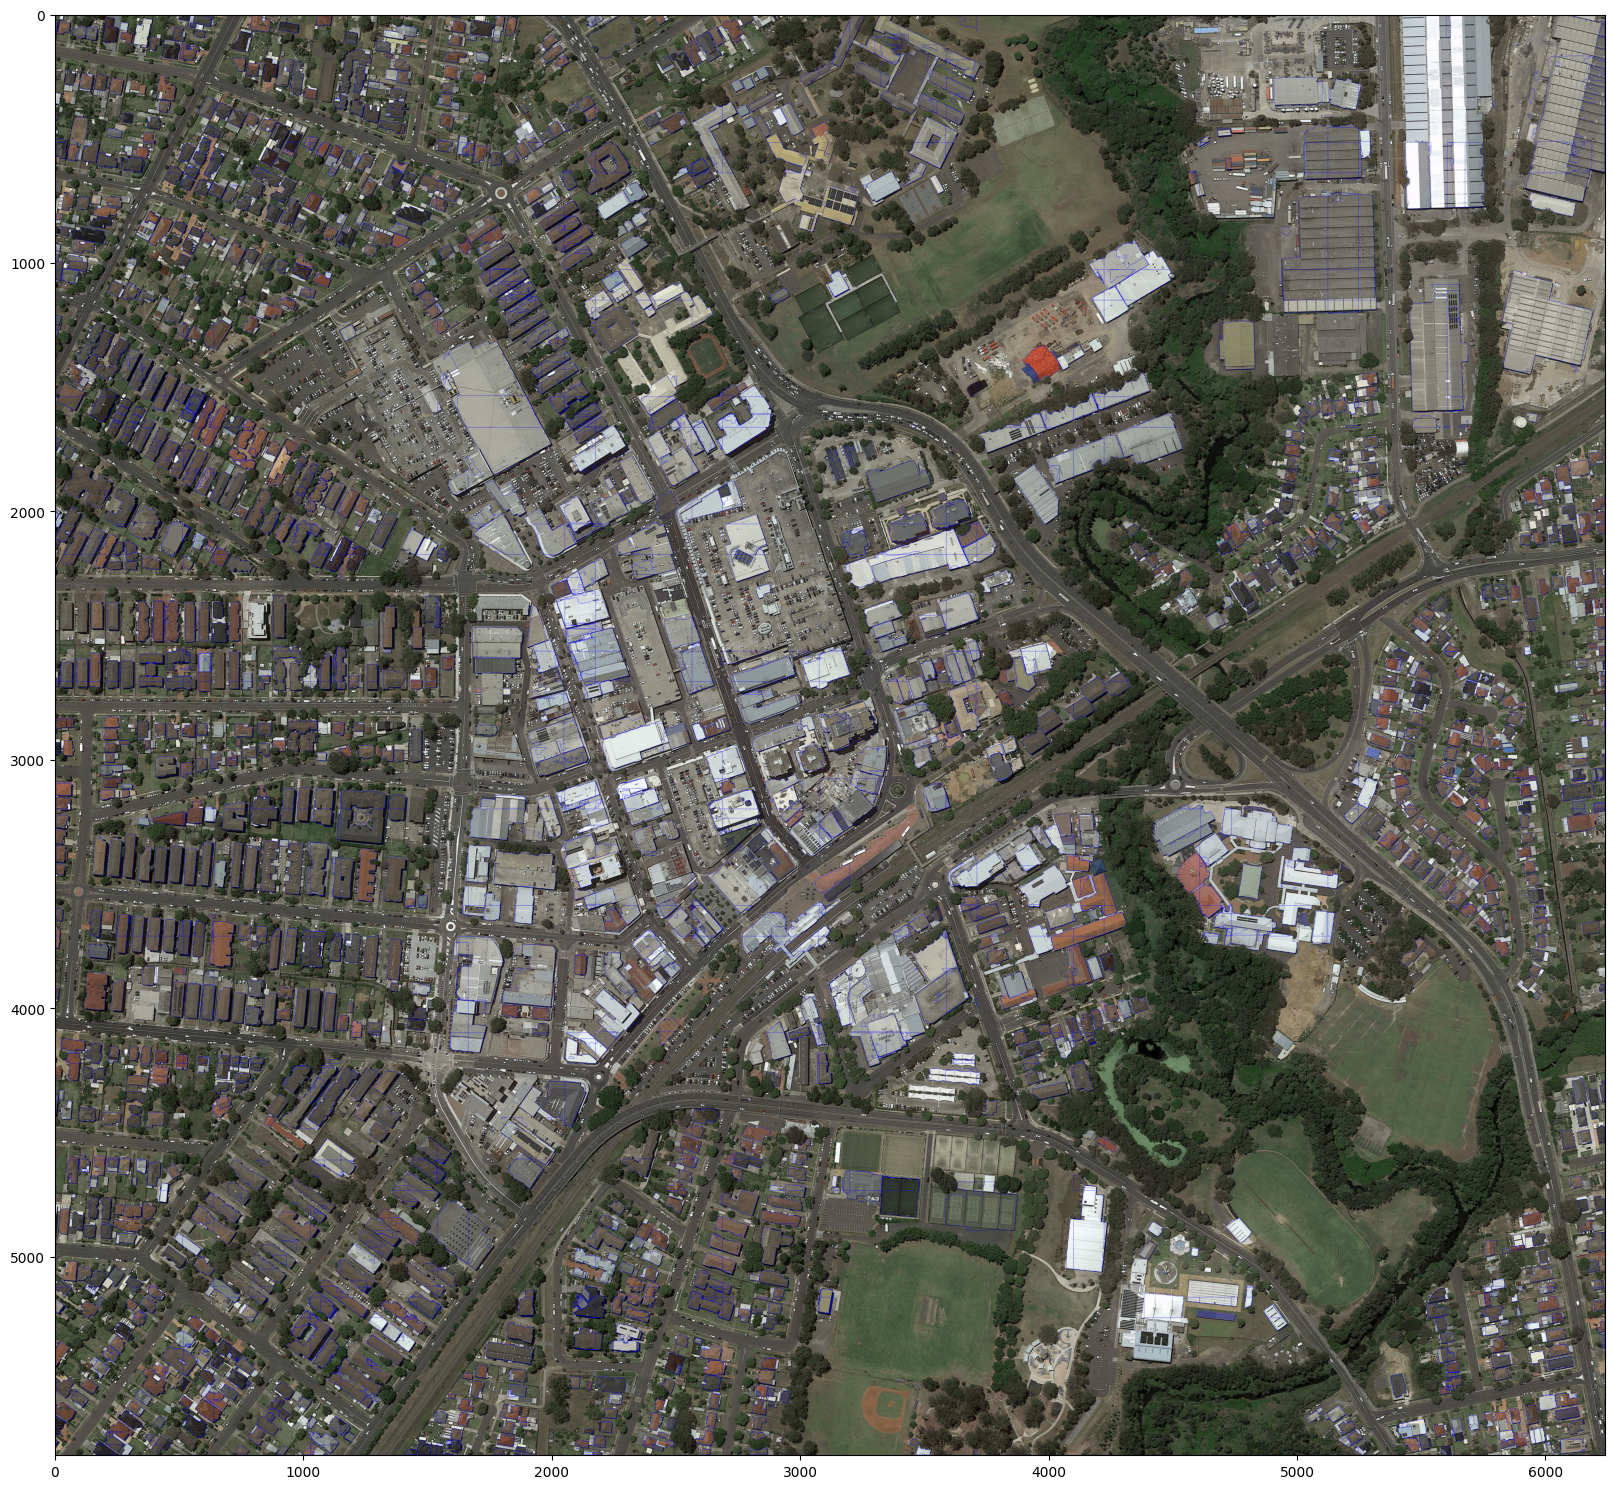

In [110]:
# result = get_prediction(
#     "/kaggle/input/building-detect/google_satellite.png",
#     Yolov8DetectionModel2(yolov8_model_path),
# #     slice_height=640,
# #     slice_width=640,
# #     overlap_height_ratio=0.2,
# #     overlap_width_ratio=0.2,
# #     postprocess = convert_to_polygon
# )
input_image = cv2.imread("/kaggle/input/building-detect/stitched_image2.png")

result = my_get_sliced_prediction(
    input_image,
    Yolov8DetectionModel2(yolov8_model_path),
    slice_height=640,
    slice_width=640,
    overlap_height_ratio=0.3,
    overlap_width_ratio=0.3
    
)

plot_coco_result(result.object_prediction_list, input_image)


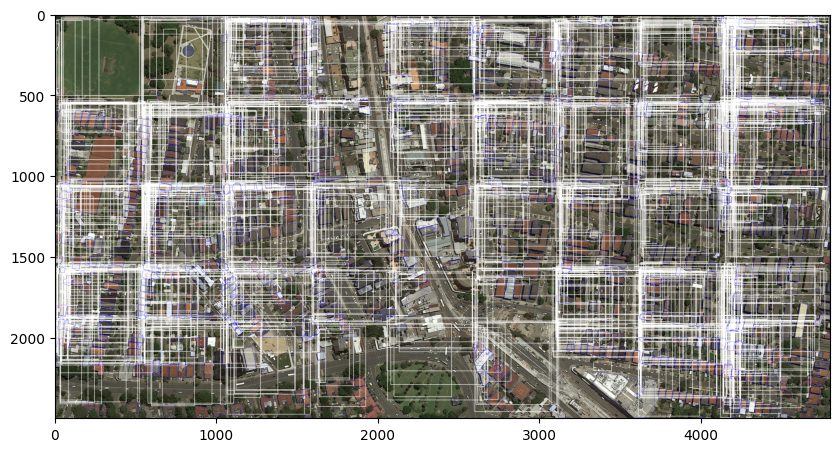

In [ ]:
# for coco in simg.coco_images():
#     print(coco.json())
result.object_prediction_list

In [20]:
result = None

In [ ]:
result.to_coco_annotations()